## Binomial Atari
>The player has a 30% chance of hitting the UFO with any single shot. If a player takes 10 shots at the UFO, what is the probability they hit it exactly 5 times?

## Description
>A trial of this simulation will be the player taking 10 shots. The random variables I am examining are probability of the player landing exactly 5 shots and seeing if the player either hits or misses the shot. I think I can assume that the player will miss more shots than they make since 30% isn't a big number. The hit or miss variables are my success and failure outcomes.

## The simulation will appear below.

In [7]:
!pip install gymnasium
!pip install ale-py
!pip install "gymnasium[atari]"
!pip install autorom[accept-rom-liscense]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


Episode finished. Total reward: 145.0

Theoretical probability of hitting the UFO exactly 5 times: 0.10292
Empirical (simulated over 100 trials) probability: 0.10000


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


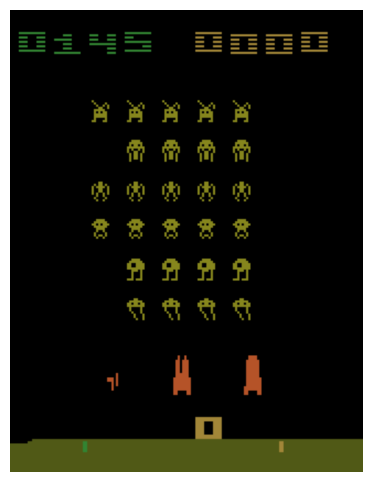

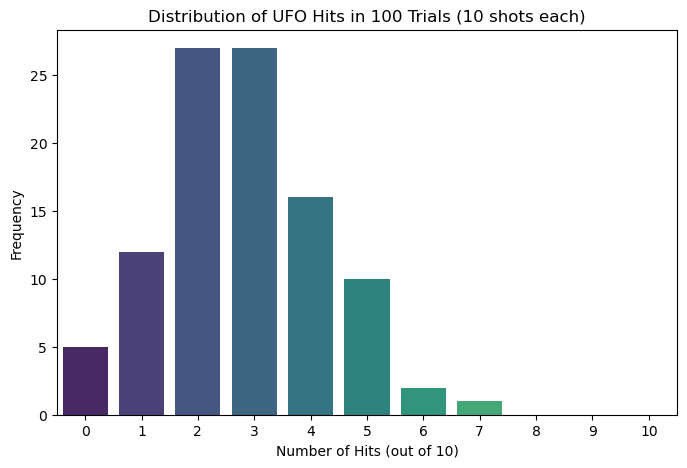

In [22]:
import gymnasium as gym
import ale_py
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import math
import random

env = gym.make("ALE/SpaceInvaders-v5", render_mode="rgb_array")

obs, info = env.reset()

plt.figure(figsize=(6, 6))
img = plt.imshow(env.render())
plt.axis("off")

done = False
total_reward = 0

while not done:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward

    frame = env.render()
    img.set_data(frame)
    display.display(plt.gcf())
    display.clear_output(wait=True)

env.close()
print("Episode finished. Total reward:", total_reward)

n = 10
p = 0.3
k = 5
trials = 100

probability = math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(f"\nTheoretical probability of hitting the UFO exactly {k} times: {probability:.5f}")

successes = 0
results = []

for _ in range(trials):
    hits = sum(random.random() < p for _ in range(n))
    results.append(hits)
    if hits == k:
        successes += 1

empirical_prob = successes / trials
print(f"Empirical (simulated over {trials} trials) probability: {empirical_prob:.5f}")

hit_counts = [results.count(i) for i in range(n + 1)]
x_values = list(range(n + 1))

plt.figure(figsize=(8, 5))
sns.barplot(x=x_values, y=hit_counts, palette="viridis")
plt.title(f"Distribution of UFO Hits in {trials} Trials (10 shots each)")
plt.xlabel("Number of Hits (out of 10)")
plt.ylabel("Frequency")
plt.show()

## Conclusion
>I have finally come to my conclusion. In this these trials, the Theoretical probability of hitting the aliens 5 times exactly is about 0.10292, while the Empirical (over 100 trials) is about 0.1000.

This answer is only linked to the current results